In [ ]:
import os
import numpy as np
from scipy import ndimage
import concurrent.futures


directory = '/data/.BillyData/greenhouseOutput/test_images/waterhemp/'

def process_file(filename):
    if filename.endswith('.npy'):
        # load the .npy file
        data = np.load(os.path.join(directory, filename))
        data = data[:,:,62:-1:3]
        
        np.save(os.path.join(directory, filename.replace('.npy', '_normal.npy')), data)
        
        # apply flip
        data_flip = np.flip(data, axis=(0, 1, 2))
        np.save(os.path.join(directory, filename.replace('.npy', '_flip.npy')), data_flip)
        
        #apply flip
        data_flip_vertical = np.flip(data, axis=0)
        np.save(os.path.join(directory, filename.replace('.npy', '_flip_vertical.npy')), data_flip_vertical)
        
        data_flip_horizontal = np.flip(data, axis=1)
        np.save(os.path.join(directory, filename.replace('.npy', '_flip_horizontal.npy')), data_flip_horizontal)
        
        # apply transpose
        data_transpose = np.transpose(data, axes=(1, 0, 2))  # adjust axes as needed
        np.save(os.path.join(directory, filename.replace('.npy', '_transpose.npy')), data_transpose)

# create a ThreadPoolExecutor
with concurrent.futures.ThreadPoolExecutor() as executor:
    # get list of .npy files in the directory
    filenames = [f for f in os.listdir(directory) if f.endswith('.npy')]
    
    # use the executor to apply the process_file function to each file
    executor.map(process_file, filenames)


In [2]:
import numpy as np

data = np.load('/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/images/sugarbeet_1_1.npy')

data = data[:,:,[30,150,220]]
data_flip = np.flip(data, axis=(0, 1, 2))
data_flip_vertical = np.flip(data, axis=0)
data_flip_horizontal = np.flip(data, axis=1)
data_transpose = np.transpose(data, axes=(1, 0, 2))


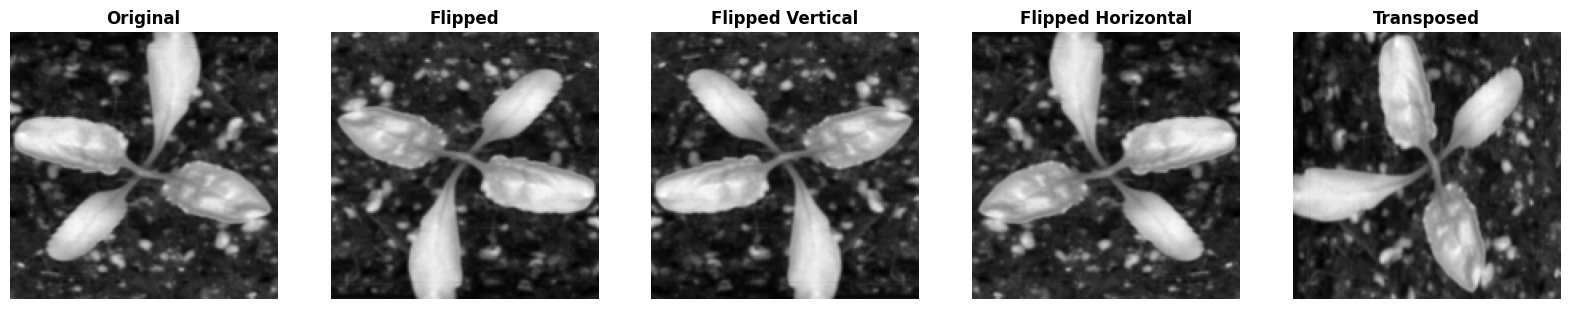

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.color import rgb2gray

# Load the data
data = np.load('/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/images/sugarbeet_1_1.npy')
data = data[:,:,[30,150,220]]

# Convert to grayscale
data = rgb2gray(data)

# Apply transformations
data_flip = np.flip(data, axis=(0, 1))
data_flip_vertical = np.flip(data, axis=0)
data_flip_horizontal = np.flip(data, axis=1)
data_transpose = np.transpose(data)

# Create a list of images and labels
images = [data, data_flip, data_flip_vertical, data_flip_horizontal, data_transpose]
labels = ['Original', 'Flipped', 'Flipped Vertical', 'Flipped Horizontal', 'Transposed']

# Resize images to square
square_size = min(data.shape[0], data.shape[1])
images = [resize(img, (square_size, square_size)) for img in images]

# Plot images in the same row
plt.figure(figsize=(20, 4))
for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label,fontsize=12, weight='bold')
    plt.axis('off')
    
plt.savefig('/Users/billygrahamram/Documents/Envs-Codes/usefulCodes/opensourcedata/augmentedimage.png', dpi=300)
plt.show()
